![梯度函數用在哪裡](imgs/keras07_location.png)

### Gradient梯度
- 在微積分裡⾯，對多元函數的參數求 ∂ 偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。
- 比如函數 f(x), 對 x 求偏導數，求得的梯度向量就是 (∂f/∂x)，簡稱 grad f(x)或者 ▽f (x)

### 梯度下降
- ⽬的：沿著⽬標函數梯度下降的⽅向搜索極⼩值（也可以沿著梯度上升的⽅向搜索極⼤值
- 要計算 Gradient Descent，考慮

> Loss = 實際 ydata – 預測 ydata = w* 實際 xdata – w*預測 xdata (bias 為 init value，被消除)

> Gradient = ▽f (θ) (Gradient = ∂L/∂w)

> 調整後的權重 = 原權重 – η(Learning rate) * Gradient

### 學習率對梯度下降的影響:
> 學習率較小時，收斂到正確結果的速度較慢。 學習率較大時，容易在搜索過程中發生震盪。

![學習率對梯度下降的影響](imgs/keras07_learningrate.png)
![學習率對梯度下降的影響](imgs/keras07_n.png)

[機器/深度學習-基礎數學(二):梯度下降法(gradient descent)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E6%95%B8%E5%AD%B8-%E4%BA%8C-%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95-gradient-descent-406e1fd001f)

![學習率太小](imgs/keras07_lr1.gif)
![學習率太大](imgs/keras07_lr2.gif)
![學習率剛剛好](imgs/keras07_lr3.gif)

### 梯度下降法的缺點包括：
- 靠近極⼩值時速度減慢。
- 直線搜索可能會產⽣⼀些問題。
- 可能會「之字型」地下降

### 梯度下降的算法調優
- Learning rate 選擇，實際上取值取決於數據樣本，如果損失函數在變⼩，說明取值有效，否則要增⼤ Learning rate
- ⾃動更新 Learning rate - 衰減因⼦ decay
> 算法參數的初始值選擇。初始值不同，獲得的最⼩值也有可能不同，因此梯度下降求得的只是局部最⼩值；當然如果損失函數是凸函數則⼀定是最優解。

#### 在訓練神經網絡的時候，通常在訓練剛開始的時候使⽤較⼤的learning rate，隨著訓練的進⾏，我們會慢慢的減⼩ learning rate 

- 具體就是每次迭代的時候減少學習率的⼤⼩， 更新公式：

 > decayed_learning_rate ＝ learning_rate * decay_rate＾(global_step / decay_steps)
 
|參數|意義|
|---|---|
|decayed_learning_rate |哀減後的學習率|
|learning_rate |初始學習率|
|decay_rate |哀減率|
|global_step |當前的 step|
|decay_steps |哀減週期|

### 使⽤ momentum 是梯度下降法中⼀種常⽤的加速技術

- 帶 momentum 項的 SGD 則寫⽣如下形式：

> v = ß ∗ v − a ∗ d x

> x ← x + v

- 其中ß即 momentum 係數，通俗的理解上⾯式⼦就是，如果上⼀次的 momentum（即ß ）與這⼀次的負梯度⽅向是相同的，那這次下降的幅度就會加⼤，所以這樣做能夠達到加速收斂的過程

# 課程目標:
    
    了解梯度下降(Gradient Descent)的基本原理與作用 
    
    --> 快速收斂, 找出最佳解

# 範例重點

定義函數: function y=(x+5)² 
在 x=3 開始, 快速收斂

# 執行步驟

Step 1 : Initialize x =3. Then, find the gradient of the function, dy/dx = 2*(x+5).

Step 2 : Move in the direction of the negative of the gradient. We use a learning rate. Let us assume the learning rate → 0.01

Step 3 : Let’s perform 2 iterations of gradient descent

Step 4 : We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

In [5]:
cur_x = 3 # The algorithm starts at x=3
lr = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function 

iters_history = [iters]
x_history = [cur_x]

In [6]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - lr * df(prev_x) #Gradient descent
    previous_step_size = abs(cur_x - prev_x) # 取較大的值, Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
     # Store parameters for plotting
    iters_history.append(iters)
    x_history.append(cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

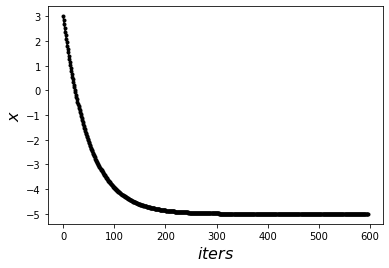

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(iters_history, x_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlabel(r'$iters$', fontsize=16)
plt.ylabel(r'$x$', fontsize=16)
plt.show()

# 作業目標:
    
    了解數學式與利用超參數調整求導梯度下降的過程

# 作業重點:

(1)dfunc 是 func 偏微分的公式，X^2 偏微分等於 2 * X，可以同時改變 func、dfunc 內容

(2)調整其它 Hyperparameters: w_init、epochs、lr、decay、momentom測試逼近的過程

[ 3.         -1.8        -3.72       -4.488      -4.7952     -4.91808
 -4.967232   -4.9868928  -4.99475712 -4.99790285 -4.99916114 -4.99966446
 -4.99986578 -4.99994631 -4.99997853 -4.99999141 -4.99999656 -4.99999863
 -4.99999945 -4.99999978 -4.99999991]


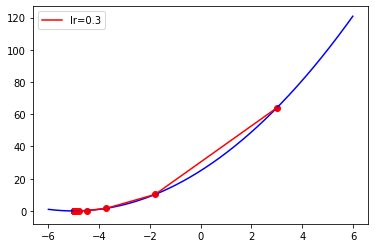

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 目標函數:y=(x+5)^2

# 目標函數一階導數:dy/dx=2*(x+5)

def func(x):
    return (x+5)**2


def dfunc(x):
    return 2*(x+5)


def GD(w_init, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置   
     """    
    xs = np.zeros(epochs+1) # 把 "epochs+1" 轉成dtype=np.float32    
    x = w_init    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要跨出的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# 起始權重
w_init = 3    
# 執行週期數
epochs = 20 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(w_init, dfunc, epochs, lr=lr) 
print (x)

#劃出曲線圖
color = 'r'    
 
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()


<Figure size 432x288 with 0 Axes>

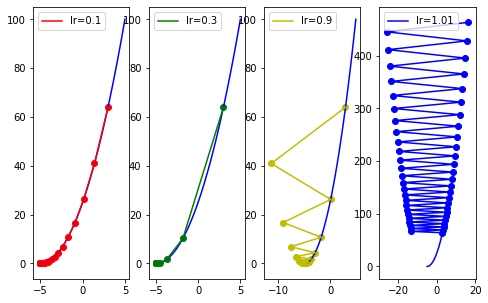

In [31]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Learning Rate')

w_init=3
epochs=50 
x = w_init
lr = [0.1,0.3,0.9, 1.01]


color = ['r', 'g', 'y','b']
size = np.ones(epochs+1) * 10
size[-1] = 70
plt.figure(figsize=(10,5))
for i in range(len(lr)):
    x = GD(w_init, dfunc, epochs, lr=lr[i])
    plt.subplot(1, 5, i+1)
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color[i], label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x), c=color[i])
    plt.legend()
plt.show()


# Result
學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了
如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生

# 學習率衰減公式

lr_i = lr_start * 1.0 / (1.0 + decay * i)


其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：

decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。
decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

In [12]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # 學習率衰減 
        lr_i = lr * 1.0 / (1.0 + decay * i)
        # v表示x要改变的幅度
        v = - dx * lr_i
        x += v
        xs[i+1] = x
    return xs

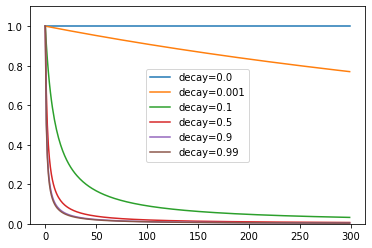

In [13]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

lr = 1.0
iterations = np.arange(300)
decay = [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]
for i in range(len(decay)):
    decay_lr = lr * (1.0 / (1.0 + decay[i] * iterations))
    plt.plot(iterations, decay_lr, label='decay={}'.format(decay[i]))

plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

# Result
衰減越大，學習率衰減地越快。
衰減確實能夠對震盪起到減緩的作用

<Figure size 432x288 with 0 Axes>

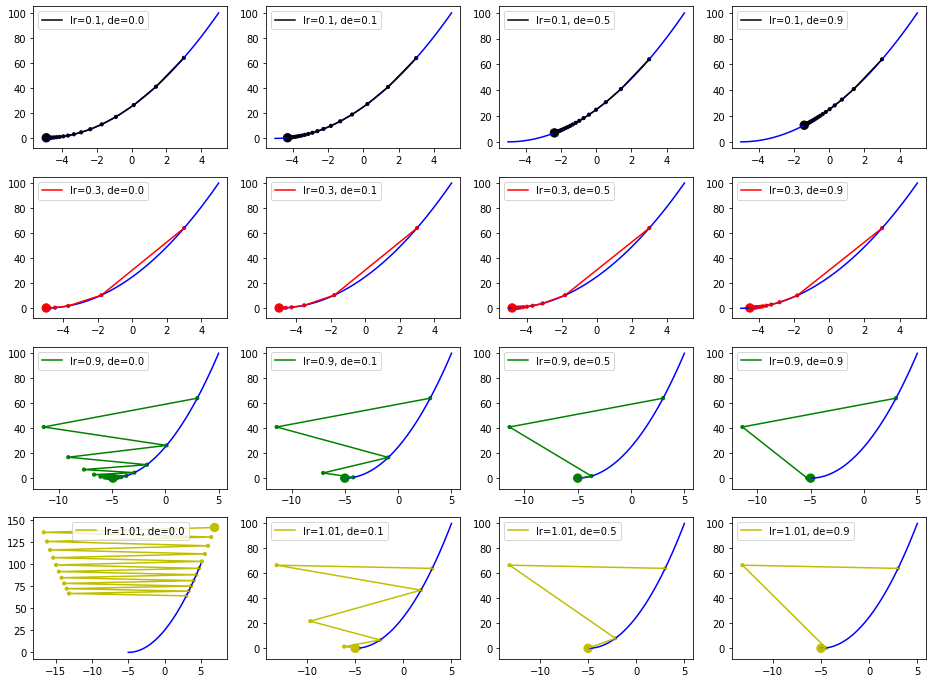

In [33]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

x_start= 3
epochs = 20

lr = [0.1,0.3,0.9,1.01]
decay = [0.0,0.1,0.5,0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
plt.figure(figsize=(16,12))
for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()

# Momentum (動量)
如何用“動量”來解決:

(1)學習率較小時，收斂到極值的速度較慢。

(2)學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和


w ← x − α ∗ dw (x沿負梯度方向下降)

v =  ß ∗ v − α  ∗ d w

w ← w + v

(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程 

如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程 



In [39]:
def momentum(w_init, df, epochs, lr, beta):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0.1
    for i in range(epochs):
        dx = df(x)
        # v表示x要改变的幅度
        v= beta*v-lr*dx
        x += v
        xs[i+1] = x
    return xs

<Figure size 432x288 with 0 Axes>

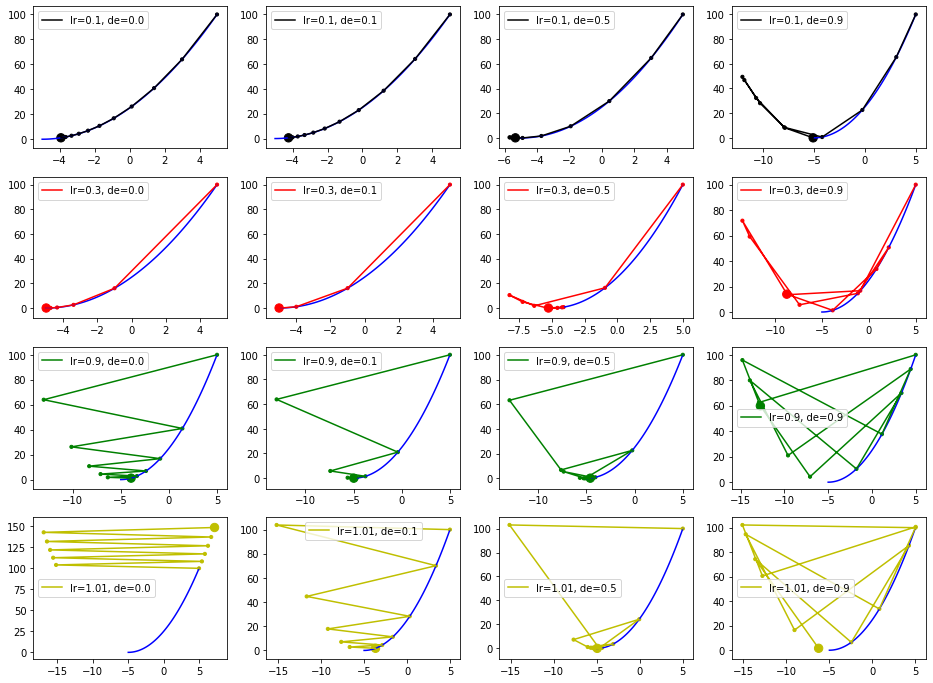

In [49]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

x_start= 5
epochs = 10

lr = [0.1,0.3,0.9,1.01]
decay = [0.0,0.1,0.5,0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
plt.figure(figsize=(16,12))
for i in range(row):
     for j in range(col):
        x = momentum(x_start, dfunc, epochs, lr=lr[i], beta=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()